##Data collection


*   **Non-recyclable** (430/400)

-hangers: 58<br>
-metal parts:95<br>
-plastic bags: 78<br> 
-shredded paper: 83 <br>
-trash wrappers: 35<br>
-used clothes: 40<br> 
-used diapers: 41<br>

*   **Cardboard** (118/100)<br>

*   **Plastic** (268/30)

-plastic bottles: 268 <br> 

*   **Metal** (238/130)

-metal food can (117)<br> 
-soda cans (121) <br>

*   **Glass** (147/30)

-glass bottle (110) <br>
-glass wine bottle (37)<br>

*   **Other recyclable** (1,877/500)

-used laptop: 277<br>
-computer keyboard: 416 <br>
-computer mouse: 433 <br>
-used monitors: 378 (note: some screens have images), <br>
-batteries: 197 <br>
-used computer: 176<br> 

*   **Compostable** (518/500)

-Food scrap: 232<br>
-Fruit peels: 93 <br>
-grease pizza box: 25<br>
-food mold: 168
<br>


## Read the dataset

In [ ]:
#Mounting the drive
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#necessary addons
import cv2
import time
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
import os
import shutil
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout
from keras import models
from keras.callbacks import EarlyStopping

In [ ]:
path1 = "new data/"
#this is our main folder for images

## Data Preparation (do not run again!)

In [ ]:
path2 = "data/"
#this is the folder that contain all of the scraped images

In [ ]:
trashnetpath = 'dataset-resized/'
#the original trashnet dataset

###Non recyclables

In [ ]:
##Creating folder for all non recyclable images (newly scraped)
path_non_recyclable = path1+'non recyclable'
try:
  os.mkdir(path_non_recyclable)
except:
  shutil.rmtree(path_non_recyclable)
  os.mkdir(path_non_recyclable)

non_rec="non-recyclable/"
non=['hanger/','metal parts/','plastic bags/','shredded paper/','trash wrappers/','used clothes/','used diapers/']
n=0
for i in non:
  for each in os.listdir(path2+non_rec+i):
    n+=1
    image = Image.open(path2+non_rec+i+each)
    image = image.convert("RGBA") #convert to rgba - this will prevent errors due to transparency
    image.save(path_non_recyclable+'/'+str(n)+'.png') #because of the conversion, we need to save our images as png

    #Because of the number we scraped, we do not need to break the for loop to adjust the number of images we need.

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
#Now we also need to move the original dataset images into this new folder

trashnet_NR="trash/"
#we do not update n
#n=431
for each in os.listdir(trashnetpath+trashnet_NR):
  n+=1
  shutil.copy2(trashnetpath+trashnet_NR+each,path_non_recyclable+'/'+str(n)+'.png') #we save as png to be consistent with the rest of the images

###Compostables

In [ ]:
path_compostable = path1+'compostable'
try:
  os.mkdir(path_compostable)
except:
  shutil.rmtree(path_compostable)
  os.mkdir(path_compostable)

rec=['compostable/food scrap/Food scrap/','compostable/fruit peels/Fruit peels/','compostable/grease pizza box/','compostable/mold food/']
n=0 #we reset numbering of the pictures
for i in rec:
  c=0
  for each in os.listdir(path2+i):
#no need to break as we need all the images
      c+=1
      n+=1
      image = Image.open(path2+i+each)
      image = image.convert("RGBA") #convert to rgba
      image.save(path_compostable+'/'+str(n)+'.png')

###Other recyclables

In [ ]:
path_other = path1+'other recyclables'
try:
  os.mkdir(path_other)
except:
  shutil.rmtree(path_other)
  os.mkdir(path_other)

rec=['other recyclables/computer keyboard/','other recyclables/computer mouse/','other recyclables/used computer/','other recyclables/used laptops/',
      'other recyclables/batteries/','other recyclables/used monitors/']
n=0 #we reset numbering of the pictures
for i in rec:
  c=0
  for each in os.listdir(path2+i):
    if(c>90): #we only need 90 of each to get to our 500 quota (we will get 540)
      break
    else:
      c+=1
      n+=1
      image = Image.open(path2+i+each)
      image = image.convert("RGBA") #convert to rgba
      image.save(path_other+'/'+str(n)+'.png')

###Cardboard and paper

In [ ]:
path_cardboard = path1+'cardboard'
try:
  os.mkdir(path_cardboard)
except:
  shutil.rmtree(path_cardboard)
  os.mkdir(path_cardboard)

rec='cardboard/cardboard/'
n=0 #we reset numbering of the pictures
#there are only 118 of those
for each in os.listdir(path2+rec):
  n+=1
  image = Image.open(path2+rec+each)
  image = image.convert("RGBA") #convert to rgba
  image.save(path_cardboard+'/'+str(n)+'.png')

In [ ]:
#Now we also need to move the original dataset images of cardboard into this new folder

trashnet_cb="cardboard/"
#we do not update n
#n=118
c=0
for each in os.listdir(trashnetpath+trashnet_cb):
  if(c>150): #we only need the first 250-118 = 132 (we will take a few more)
      break
  else:
    n+=1
    c+=1
    shutil.copy2(trashnetpath+trashnet_cb+each,path_cardboard+'/'+str(n)+'.png')

In [ ]:
#Now we also need to move the original dataset images of paper into this new folder

trashnet_paper="paper/"
#we do not update n
#n=269
c=0
for each in os.listdir(trashnetpath+trashnet_paper):
  if(c>250): #we only need the first 250
      break
  else:
    n+=1
    c+=1
    shutil.copy2(trashnetpath+trashnet_paper+each,path_cardboard+'/'+str(n)+'.png')

###Glass

In [ ]:
path_glass = path1+'glass'
try:
  os.mkdir(path_glass)
except:
  shutil.rmtree(path_glass)
  os.mkdir(path_glass)

rec=['glass/glass bottle/','glass/glass wine bottle/']
n=0 #we reset numbering of the pictures
for i in rec:
  c=0
  for each in os.listdir(path2+i):
    if(c>30): #we only need 30 total but we will take a bit more: 30 of each class
      break
    else:
      c+=1
      n+=1
      image = Image.open(path2+i+each)
      image = image.convert("RGBA") #convert to rgba
      image.save(path_glass+'/'+str(n)+'.png')

In [ ]:
#Now we also need to move the original dataset images of glass into this new folder

trashnet_glass="glass/"
#we do not update n
for each in os.listdir(trashnetpath+trashnet_glass):
 #no break needed - we take them all
    n+=1
    shutil.copy2(trashnetpath+trashnet_glass+each,path_glass+'/'+str(n)+'.png')

###Metal

In [ ]:
path_metal = path1+'metal'
try:
  os.mkdir(path_metal)
except:
  shutil.rmtree(path_metal)
  os.mkdir(path_metal)

rec=['metal recyclable/metal food can/','metal recyclable/soda can 121/']
n=0 #we reset numbering of the pictures

for i in rec:
  c=0
  for each in os.listdir(path2+i):
    if(c>70): #we only need 130 total but we will take a bit more: 70 of each sub-class
      break
    else:
      c+=1
      n+=1
      image = Image.open(path2+i+each)
      image = image.convert("RGBA") #convert to rgba
      image.save(path_metal+'/'+str(n)+'.png')


In [ ]:
#Now we also need to move the original dataset images of metal into this new folder

trashnet_metal="metal/"
#we do not update n
n=142
for each in os.listdir(trashnetpath+trashnet_metal):
 #no break needed - we take them all
    n+=1
    shutil.copy2(trashnetpath+trashnet_metal+each,path_metal+'/'+str(n)+'.png')

###Plastic

In [ ]:
path_plastic = path1+'plastic'
try:
  os.mkdir(path_plastic)
except:
  shutil.rmtree(path_plastic)
  os.mkdir(path_plastic)

rec='plastics/plastic bottles/'
n=0 #we reset numbering of the pictures  
c=0
for each in os.listdir(path2+rec):
    if(c>250): #we will split our scraping with the original dataset: 50/50
      break
    else:
      c+=1
      n+=1
      image = Image.open(path2+rec+each)
      image = image.convert("RGBA") #convert to rgba
      image.save(path_plastic+'/'+str(n)+'.png')


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
#Now we also need to move the original dataset images of plastic into this new folder

trashnet_plastic="plastic/"
#we do not update n
c=0
for each in os.listdir(trashnetpath+trashnet_plastic):
  if(c>250): #we only need the first 250
      break
  else:
    n+=1
    c+=1
    shutil.copy2(trashnetpath+trashnet_plastic+each,path_plastic+'/'+str(n)+'.png')

###Checking the data

In [ ]:
print(len(os.listdir(path_non_recyclable)))
print(len(os.listdir(path_compostable)))
print(len(os.listdir(path_other)))
print(len(os.listdir(path_cardboard)))
print(len(os.listdir(path_glass)))
print(len(os.listdir(path_metal)))
print(len(os.listdir(path_plastic)))

#Our data is nicely balanced!

573
527
546
517
535
503
502


###Train and validation split (do not run again!)

In [ ]:
train_dir = path1+"train"
val_dir=path1+"val"
test_dir=path1+"test"

In [ ]:
#Creating folders:
#non recyclables
try:
  os.makedirs(train_dir+'/non_recyclable')
except:
  shutil.rmtree(train_dir+'/non_recyclable')
  os.makedirs(train_dir+'/non_recyclable')

try:
  os.makedirs(test_dir+'/non_recyclable')
except:
  shutil.rmtree(test_dir+'/non_recyclable')
  os.makedirs(test_dir+'/non_recyclable')

#compostables
try:
  os.makedirs(train_dir+'/compostables')
except:
  shutil.rmtree(train_dir+'/compostables')
  os.makedirs(train_dir+'/compostables')

try:
  os.makedirs(test_dir+'/compostables')
except:
  shutil.rmtree(test_dir+'/compostables')
  os.makedirs(test_dir+'/compostables')

  #other
try:
  os.makedirs(train_dir+'/other')
except:
  shutil.rmtree(train_dir+'/other')
  os.makedirs(train_dir+'/other')

try:
  os.makedirs(test_dir+'/other')
except:
  shutil.rmtree(test_dir+'/other')
  os.makedirs(test_dir+'/other')

#cardboard
try:
  os.makedirs(train_dir+'/cardboard')
except:
  shutil.rmtree(train_dir+'/cardboard')
  os.makedirs(train_dir+'/cardboard')

try:
  os.makedirs(test_dir+'/cardboard')
except:
  shutil.rmtree(test_dir+'/cardboard')
  os.makedirs(test_dir+'/cardboard')

#glass
try:
  os.makedirs(train_dir+'/glass')
except:
  shutil.rmtree(train_dir+'/glass')
  os.makedirs(train_dir+'/glass')

try:
  os.makedirs(test_dir+'/glass')
except:
  shutil.rmtree(test_dir+'/glass')
  os.makedirs(test_dir+'/glass')
  
#metal
try:
  os.makedirs(train_dir+'/metal')
except:
  shutil.rmtree(train_dir+'/metal')
  os.makedirs(train_dir+'/metal')

try:
  os.makedirs(test_dir+'/metal')
except:
  shutil.rmtree(test_dir+'/metal')
  os.makedirs(test_dir+'/metal') 

#plastic
try:
  os.makedirs(train_dir+'/plastic')
except:
  shutil.rmtree(train_dir+'/plastic')
  os.makedirs(train_dir+'/plastic')

try:
  os.makedirs(test_dir+'/plastic')
except:
  shutil.rmtree(test_dir+'/plastic')
  os.makedirs(test_dir+'/plastic')   

In [ ]:
#We are splitting the data 75/25 - first 375 images into the train folders:
for each in range(1,375):
   shutil.copy2(path_non_recyclable+'/'+str(each)+'.png',train_dir+'/non_recyclable/'+str(each)+'.png')
for each in range(1,375):
  shutil.copy2(path_compostable+'/'+str(each)+'.png',train_dir+'/compostables/'+str(each)+'.png')  
for each in range(1,375):
  shutil.copy2(path_other+'/'+str(each)+'.png',train_dir+'/other/'+str(each)+'.png') 
for each in range(1,375):
  shutil.copy2(path_cardboard+'/'+str(each)+'.png',train_dir+'/cardboard/'+str(each)+'.png') 
for each in range(1,375):
  shutil.copy2(path_glass+'/'+str(each)+'.png',train_dir+'/glass/'+str(each)+'.png') 
for each in range(1,375):
  shutil.copy2(path_metal+'/'+str(each)+'.png',train_dir+'/metal/'+str(each)+'.png') 
for each in range(1,375):
  shutil.copy2(path_plastic+'/'+str(each)+'.png',train_dir+'/plastic/'+str(each)+'.png') 

In [ ]:
#The remaining for each class goes into the test folders:
for each in range(375,573):
  shutil.copy2(path_non_recyclable+'/'+str(each)+'.png',test_dir+'/non_recyclable/'+str(each)+'.png')
for each in range(375,527):
  shutil.copy2(path_compostable+'/'+str(each)+'.png',test_dir+'/compostables/'+str(each)+'.png')  
for each in range(375,546):
  shutil.copy2(path_other+'/'+str(each)+'.png',test_dir+'/other/'+str(each)+'.png') 
for each in range(375,520):
  shutil.copy2(path_cardboard+'/'+str(each)+'.png',test_dir+'/cardboard/'+str(each)+'.png') 
for each in range(375,535):
  shutil.copy2(path_glass+'/'+str(each)+'.png',test_dir+'/glass/'+str(each)+'.png') 
for each in range(375,503):
  shutil.copy2(path_metal+'/'+str(each)+'.png',test_dir+'/metal/'+str(each)+'.png') 
for each in range(375,502):
  shutil.copy2(path_plastic+'/'+str(each)+'.png',test_dir+'/plastic/'+str(each)+'.png') 

#Modeling



In [ ]:
#Same as above - run this to be able to do the modeling!
train_dir = path1+"train"
val_dir=path1+"val"
test_dir=path1+"test"

##First Model - using data augmentation

We created our own model using the Sequential function.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3))) # this needs to match with our data prep - upcoming!
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(Dropout(0.5)) #Aggressive Droupout to avoid the model learning too fast
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.5)) #Aggressive Droupout to avoid the model learning too fast
model.add(layers.Dense(7, activation='softmax')) #softmax because we have multiple categories

This is what our model looks like now:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Initialize our generators:

In [ ]:
#We will use data augmentation as we have a small dataset
# All images will be rescaled by 1./255
train_datagen=ImageDataGenerator(horizontal_flip=True, 
                                 vertical_flip=True,
                                 validation_split=0.1,
                                 rescale=1./255,
                                 shear_range = 0.2, zoom_range = 0.2,
                                 width_shift_range = 0.2,
                                 height_shift_range = 0.2,
                                 rotation_range=40)
test_datagen=ImageDataGenerator(rescale=1./255)

Use flow_from_directory() to read the images:

In [ ]:
train_generator=train_datagen.flow_from_directory(
                        train_dir, # This is the target directory
                        target_size=(150,150), # All images will be resized to 150x150
                        class_mode='categorical', # Since we use categorical_crossentropy loss, we need categorical labels 
                        batch_size=20)
test_generator=test_datagen.flow_from_directory(
                        test_dir,
                        target_size=(150,150),
                        class_mode='categorical',
                        batch_size=20)

Found 2618 images belonging to 7 classes.
Found 1081 images belonging to 7 classes.


Compile the model:

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Print the batch shape on the data and labels:

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 7)


Set an early stopping:

In [ ]:
# Early stopping
# Set the mode to max to maximize the validation accuracy and restore the best weights
es = EarlyStopping(monitor='val_accuracy', mode='max',
                   patience=30, 
                   verbose=1,
                   restore_best_weights=True)

Run the model:

In [ ]:
start = time.time()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=2618//20,
      epochs=50, #We have limited the epochs to 50 despite the early stopping callback as this was taking a very long time to train!
      validation_data=test_generator,
      validation_steps=1081//20,
      callbacks=[es]) 
end = time.time()
print(end - start)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
130/130 [==============================] - 1171s 9s/step - loss: 1.7610 - accuracy: 0.2987 - val_loss: 1.8077 - val_accuracy: 0.3194
Epoch 2/50
130/130 [==============================] - 262s 2s/step - loss: 1.5868 - accuracy: 0.4018 - val_loss: 1.7234 - val_accuracy: 0.3176
Epoch 3/50
130/130 [==============================] - 256s 2s/step - loss: 1.4831 - accuracy: 0.4503 - val_loss: 1.7450 - val_accuracy: 0.3481
Epoch 4/50
130/130 [==============================] - 260s 2s/step - loss: 1.3956 - accuracy: 0.4842 - val_loss: 1.6686 - val_accuracy: 0.3741
Epoch 5/50
130/130 [==============================] - 256s 2s/step - loss: 1.3505 - accuracy: 0.5023 - val_loss: 1.6596 - val_accuracy: 0.3815
Epoch 6/50
130/130 [==============================] - 268s 2s/step - loss: 1.3161 - accuracy: 0.5173 - val_loss: 1.6572 - val_accuracy: 0.3759
Epoch 7/50
130/130 [==============================] - 267s 2s/step - loss: 1.2713 - accuracy: 0.5316 - val_loss: 1.6430 - val_accuracy: 0.387

Unfortunately, the model was still training when reaching the 50eth epoch. In an ideal scenario, we could have let it run for 100epochs.

In [ ]:
#save the model
model.save(path1+'/EcoNet_class_Model_1.h5')

Plot the learning curves:

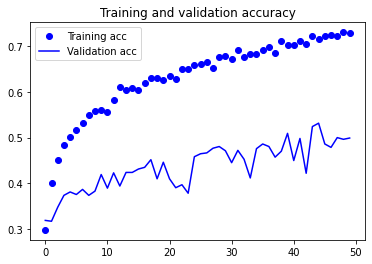

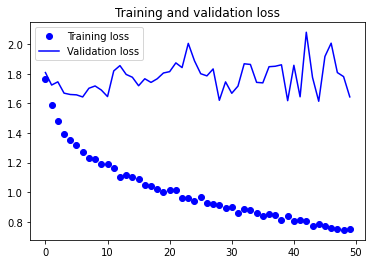

In [ ]:
#Let's plot the loss and accuracy of the model over the training and validation data during training:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow import keras
model1 = keras.models.load_model('/content/drive/Shareddrives/OPIM 5509_Intro to Deep Learning_Group 3 /new data/EcoNet_class_Model_1.h5')
# Check its architecture
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
# Evaluate the model
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')
test_loss, test_acc = model1.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1081 images belonging to 7 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.49799999594688416


The model still showed potential for improvement as the validation accuracy was still increasing. However the training accuracy increased much faster than the validation one which indicated an overfit. We managed to reach approximately 50% accuracy with this model, which is a decent result considering we have 7classes.

Training acc: 0.7148, val_acc: 0.5315

## Second Model - using transfer learning

A potential direction to avoid overfitting due to the size of the data would be to use a pre-trained ConvNet: we use transfer learning. Here, we are using the VGG16 architecture and weights and will fine tune it by unfreezing the last convolutional layer.

In [ ]:
# Instantiate a VGG16 model
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet', # weights from imagenet - very important! otherwise it's just the network structure
                  include_top=False, # this means that our dense layer will be trained specific to our small data problem that we are solving
                                     # False: as we can use our own densely-connected classifier (7 classes)
                  input_shape=(150, 150, 3)) # this is the shape of the data from our data generator

58900480/58889256 [==============================] - 1s 0us/step


See what VGG16 model looks like now:

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Build our own model:

In [ ]:
from keras import models
from keras import layers
#We add our fully connected layers to the convolutional base
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(7, activation='Softmax'))

This is what our model looks like now:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 1799      
Total params: 16,813,895
Trainable params: 16,813,895
Non-trainable params: 0
_________________________________________________________________


Before we compile and train our model, it is very important to freeze the convolutional base. "Freezing" a layer or set of layers means preventing their weights from getting updated during training. If we don't do this, then the representations that were previously learned by the convolutional base would get modified during training. Since the Dense layers on top are randomly initialized, very large weight updates would be propagated through the network, effectively destroying the representations previously learned.

In Keras, freezing a network is done by setting its trainable attribute to False:

In [ ]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [ ]:
conv_base.trainable = False

In [ ]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


With this setup, only the weights from the two `Dense` layers that we added will be trained. That's a total of four weight tensors: two per layer (the main weight matrix and the bias vector). Note that in order for these changes to take effect, we must first compile the model. If you ever modify weight trainability after compilation, you should then re-compile the model, or these changes would be ignored.

Now we can start training our model. First, we initialize our generators and use flow_from_directory() to read the images:

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#We still use data augmentation!
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # also need to use categorical labels 
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 2618 images belonging to 7 classes.
Found 1081 images belonging to 7 classes.


In [ ]:
# Only make a few layer trainable
conv_base.trainable = True

# Let's train the last few layers in block5
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

Create an early stopping:

In [ ]:
# Early stopping
# Set the mode to max and restore the best weights
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', mode='max', 
                   patience=10, 
                   restore_best_weights=True)

Run the model:

In [ ]:
start = time.time()
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=test_generator,
      validation_steps=50,
      callbacks = [es],
      verbose=2)
end = time.time()
print(end - start)

Epoch 1/100
100/100 - 1050s - loss: 1.2275 - acc: 0.5660 - val_loss: 1.5302 - val_acc: 0.4150
Epoch 2/100
100/100 - 844s - loss: 1.0275 - acc: 0.6291 - val_loss: 1.4624 - val_acc: 0.4670
Epoch 3/100
100/100 - 837s - loss: 0.9169 - acc: 0.6707 - val_loss: 1.4557 - val_acc: 0.5040
Epoch 4/100
100/100 - 841s - loss: 0.8475 - acc: 0.6937 - val_loss: 1.3724 - val_acc: 0.5220
Epoch 5/100
100/100 - 838s - loss: 0.7838 - acc: 0.7232 - val_loss: 1.3960 - val_acc: 0.5340
Epoch 6/100
100/100 - 837s - loss: 0.7289 - acc: 0.7327 - val_loss: 1.4066 - val_acc: 0.5510
Epoch 7/100
100/100 - 846s - loss: 0.6822 - acc: 0.7450 - val_loss: 1.3559 - val_acc: 0.5550
Epoch 8/100
100/100 - 850s - loss: 0.6628 - acc: 0.7608 - val_loss: 1.2820 - val_acc: 0.5870
Epoch 9/100
100/100 - 848s - loss: 0.6165 - acc: 0.7938 - val_loss: 1.3324 - val_acc: 0.5910
Epoch 10/100
100/100 - 859s - loss: 0.5807 - acc: 0.7935 - val_loss: 1.3410 - val_acc: 0.5870
Epoch 11/100
100/100 - 858s - loss: 0.5449 - acc: 0.7960 - val_loss:

In [ ]:
#save the model
model.save(path1+'/EcoNet_class_Model_1-93.h5')

Plot the learning curves:

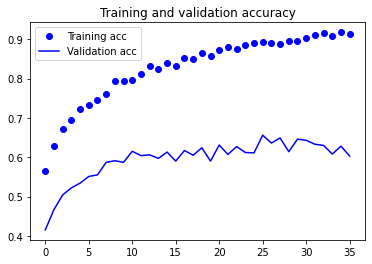

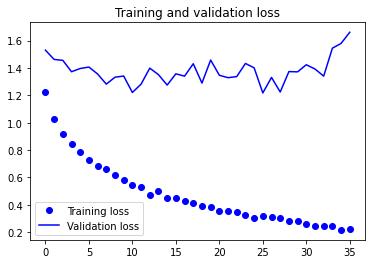

In [ ]:
#Let's plot the loss and accuracy of the model over the training and validation data during training:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow import keras
new_model = keras.models.load_model(path1+'EcoNet_class_Model_1-93.h5')
# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1799      
Total params: 16,813,895
Trainable params: 9,178,631
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
# Evaluate the model
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = new_model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1081 images belonging to 7 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.6570000052452087


Using transfer learning increased our accuracy from 50% to 65%!<br>
We still do see signs of overfitting which could be improved, for example by including droupout layers between our dense layers.

##Baseline models

###Random Guess baseline

First, we want to make sure our model does better than a "random guess". We calculate the accuracy of a random guess as follow:<br>
$Accuracy = \frac{1}{k}$<br>
With $k$ being our number of class (here, 7). A random guess accuracy would be of about 14%.<br>
Our model does better than that! (yay!)

In [ ]:
random_accuracy = 1/7 #seven classes
random_accuracy

0.14285714285714285

###Trashnet Model

Comparing with Trashnet model is more challenging. They did achieve an initial accuracy of 63% but their test data showed an accuracy of only 25%.<br>
With data augmentation and transfer learning, we managed to beat this initial accuracy (model accuracy being 65%).<br>
However a few things are not fully transferable as our model differ from trashnet in few areas:


*   Our number of class is larger, having a total of 7 classes compared to their original 6.
*   We have combined two of their classes together: because paper and cardboard usually belong in the same bin, we have made only one class out of them.
*   We have included challenging images that would make training more difficult: inclusion of contaminated cardboard into recyclables, images on screens for electronics, etc.
*   Our images contain a lot of scraped images from the internet, whereas their pictures seem to be different angles of the same objects. This may be considered as a manual data augmentation, and maybe the model recognizes those objects more easily, as opposed to using very different images or objects.



#Results and Discussion



Both our model yielded reasonable results that would optimize the classification of trash into the correct recycling bin, in comparison to a random guess.

*   **Model one**: training from scratch

Our first model comprised of 4 convolutional and Maxpooling layers, then flattened to feed into 2 Dense layers. We've observed overfitting which we tried to compensate by including a data augmentation step along with aggressive droupouts in between our dense layers. We reached an accuracy of about 50%. 

*   **Model two**: using transfer learning

Transfer learning improved our classification, as reaching an accuracy of 65%. We still saw signs of overfitting, which could further be improved by adding dropouts in between our dense layers.

#Conclusion

*   With a relatively small dataset and using techniques such as data augmentation and transfer learning, we were able to generate a model that classify trash items into 7 categories with a 65% accuracy.
*   Our model seems to do better than a random guess classifier and also better than the original trashnet model this project was inspired from.
*   Our train and validation split was not optimized to account for the many subcategories we had, but should be mitigated by having most of the original trashnet images into the validation partition: those images are more varied that the scraping. The possible issues would be seen with the other recyclables and compostables categories.
*   Our model would benefit a separate test partition. Because of the low number of images available, we can unfortunately only rely on our validation results. A proposed next step would be to generate images of real-life items to feed into our test partition.
*   One future recommendation to improve this model would be as always, increase the number of images in the train partition, possibly by adding real-life images into it. A possible way to do so would be to roll out this model as a beta version of an app and ask consumers to use it. The images would then be manually labelled to add into the classifier until the accuracy reached a higher level (80-90%)


#Appendices

## Confusion Matrix and Classification Report

The below confusion matrices did not align with our original results of 65%. We did not find where the error came from.

For Model 1:

In [ ]:
#load saved model 1 
from keras.models import load_model

model1 = load_model('/content/drive/Shareddrives/OPIM 5509_Intro to Deep Learning_Group 3 /new data/EcoNet_class_Model_1.h5') 
model1.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
#Import Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix

# set variables for actual vs. predicted data for Model 2
y_true = model1.predict_generator(test_generator, 2618 // 21)
y_pred = np.argmax(y_true, axis=1)
# print Confusion Matrix for Model 1
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
# print Classification Report for Model 1
print('Classification Report')
target_names = ['non recyclable','compostables','other','cardboard','glass','metal','plastic']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[31 17 33 27 12 16  9]
 [35 25 26 23  7 24 12]
 [33 19 29 31 18 17 13]
 [29 13 26 20 14 19  7]
 [35 26 35 40 13 31 18]
 [35 23 39 30  9 29  6]
 [24 18 26 26 11 19  3]]
Classification Report
                precision    recall  f1-score   support

non recyclable       0.14      0.21      0.17       145
  compostables       0.18      0.16      0.17       152
         other       0.14      0.18      0.16       160
     cardboard       0.10      0.16      0.12       128
         glass       0.15      0.07      0.09       198
         metal       0.19      0.17      0.18       171
       plastic       0.04      0.02      0.03       127

      accuracy                           0.14      1081
     macro avg       0.13      0.14      0.13      1081
  weighted avg       0.14      0.14      0.13      1081



Despite the warning, the confusion matrix ran on all the test data.

For Model 2:

In [ ]:
#load saved model 2

model2 = load_model('/content/drive/Shareddrives/OPIM 5509_Intro to Deep Learning_Group 3 /new data/EcoNet_class_Model_1-93.h5') 
model2.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1799      
Total params: 16,813,895
Trainable params: 9,178,631
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
# set variables for actual vs. predicted data for Model 2
y_true = model2.predict_generator(test_generator, 2618 // 21)
y_pred = np.argmax(y_true, axis=1)
# print Confusion Matrix for Model 2
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
# print Classification Report for Model 2
print('Classification Report')
target_names = ['non recyclable','compostables','other','cardboard','glass','metal','plastic']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[17 31 12 25 13 16 31]
 [22 26 23 20 17 18 26]
 [22 25 14 26 15 22 36]
 [14 16 24 23 18 14 19]
 [31 32 33 31 19 23 29]
 [28 21 35 28 16 21 22]
 [19 15 27 24 11 13 18]]
Classification Report
                precision    recall  f1-score   support

non recyclable       0.11      0.12      0.11       145
  compostables       0.16      0.17      0.16       152
         other       0.08      0.09      0.09       160
     cardboard       0.13      0.18      0.15       128
         glass       0.17      0.10      0.12       198
         metal       0.17      0.12      0.14       171
       plastic       0.10      0.14      0.12       127

      accuracy                           0.13      1081
     macro avg       0.13      0.13      0.13      1081
  weighted avg       0.13      0.13      0.13      1081



*Five bullet points that sum up everything you did and how it solves the business problem.*

## Feature extraction

Below is our trial in using feature extraction instead of fine tuning. The code unfortunately didn't work as optimized for a binary problem. Our batch shape include 7 categories, but below only 1.

In [ ]:
# ERROR - DO NOT RUN
# let's time it
from datetime import datetime
startTime = datetime.now()

# initialize your generator
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) # this is given from the VGG16 architecture!
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2618 ) # 2010?
print(datetime.now() - startTime)
# validation_features, validation_labels = extract_features(validation_dir, 1000)
# print(datetime.now() - startTime)
test_features, test_labels = extract_features(test_dir, 1081)
print(datetime.now() - startTime)